### Análise das variáveis

In [1]:
#CONTRIBUIÇÃO DA COLEGA CINTIA

# Informações da base de dados
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

df1 = pd.read_csv('acidentes2024_todas_causas_tipos.csv', encoding="ISO-8859-1", sep=';')
print(f'Linhas x Colunas: {df1.shape}')
print(f'Total de registros: {len(df1)}')
print(f'Total de acidentes únicos: {df1['id'].nunique()}')

Linhas x Colunas: (603215, 37)
Total de registros: 603215
Total de acidentes únicos: 73156


In [2]:
# Tipos de dados da base de dados
print(df1.dtypes)

id                        float64
pesid                     float64
data_inversa                  str
dia_semana                    str
horario                       str
uf                            str
br                        float64
km                            str
municipio                     str
causa_principal               str
causa_acidente                str
ordem_tipo_acidente         int64
tipo_acidente                 str
classificacao_acidente        str
fase_dia                      str
sentido_via                   str
condicao_metereologica        str
tipo_pista                    str
tracado_via                   str
uso_solo                      str
id_veiculo                float64
tipo_veiculo                  str
marca                         str
ano_fabricacao_veiculo    float64
tipo_envolvido                str
estado_fisico                 str
idade                     float64
sexo                          str
ilesos                    float64
feridos_leves 

In [3]:
# registros nulos
print(df1.isnull().sum().sort_values(ascending=False).head(10))

idade             109408
feridos_graves     57641
mortos             57641
feridos_leves      57641
pesid              57641
sexo               57641
estado_fisico      57641
tipo_envolvido     57641
ilesos             57641
id_veiculo         19572
dtype: int64


Qualitativa nominal: br, uf, municipio, causa_acidente, tipo_acidente, sentido_via, condicao_metereologica, tipo_pista, tracado_via, uso_solo, tipo_veiculo, marca, tipo_envolvido, estado_fisico, sexo, regional, delegacia, uop.   

Qualitativa Ordinal: classificacao_acidente, fase_dia.    

Quantitativa Discreta: ilesos, feridos_leves, feridos_graves, mortos, ano_fabricacao_veiculo.  

Quantitativa Contínua: idade, km, latitude, longitude

### Análise de idade

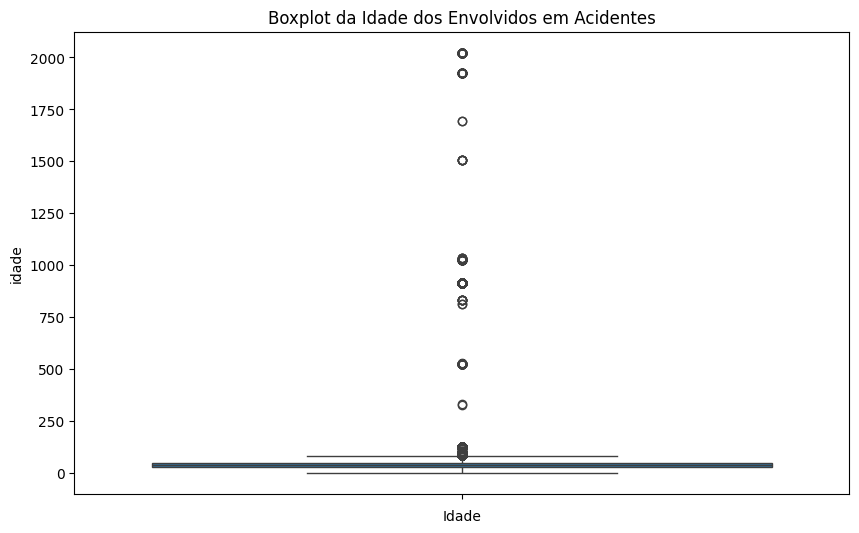

In [4]:
plt.figure(figsize=(10, 6))
sns.boxplot(y=df1['idade'])
plt.title("Boxplot da Idade dos Envolvidos em Acidentes")
plt.xlabel("Idade")
plt.show()

In [5]:
# Retirar idades erradas, tinham muitos outliers que afetariam a analise de idade
df1 = df1[(df1['idade'] <= 100)]

In [6]:
media_idade = df1['idade'].mean()
mediana_idade = df1['idade'].median()
moda_idade = df1['idade'].mode()
amplitude_idade = df1['idade'].max() - df1['idade'].min()
desvio_idade = df1['idade'].std()
assimetria_idade = df1['idade'].skew()
curtose_idade = df1['idade'].kurt()

print(f'Média: {round(media_idade, 2)}')
print(f'Mediana: {mediana_idade}')
print(f'Moda: {moda_idade[0]}')
print(f'Amplitude: {amplitude_idade}')
print(f'Desvio: {round(desvio_idade, 2)}')
print(f'Assimetria: {round(assimetria_idade, 2)}')
print(f'Curtose: {round(curtose_idade, 3)}')

Média: 38.79
Mediana: 38.0
Moda: 25.0
Amplitude: 99.0
Desvio: 15.5
Assimetria: 0.28
Curtose: -0.18


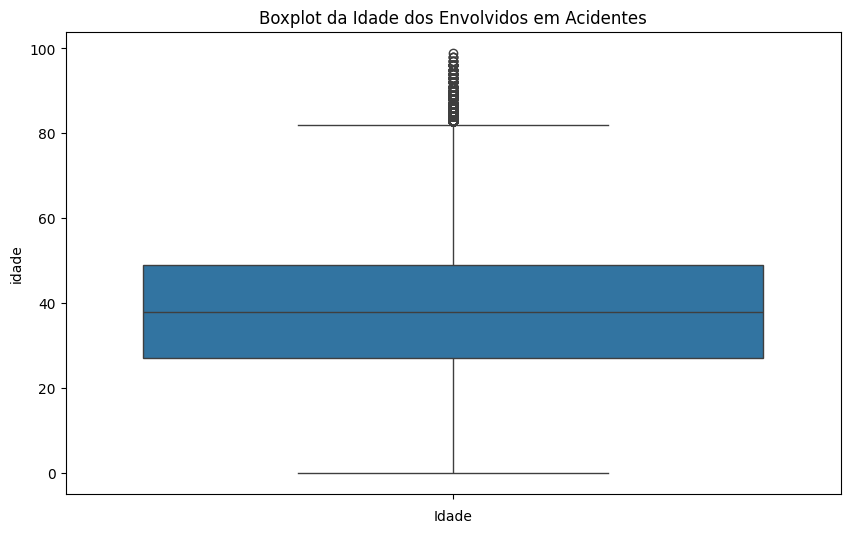

In [7]:
plt.figure(figsize=(10, 6))
sns.boxplot(y=df1['idade'])
plt.title("Boxplot da Idade dos Envolvidos em Acidentes")
plt.xlabel("Idade")
plt.show()

<Axes: title={'center': 'Distribuição de Idade'}, ylabel='Frequency'>

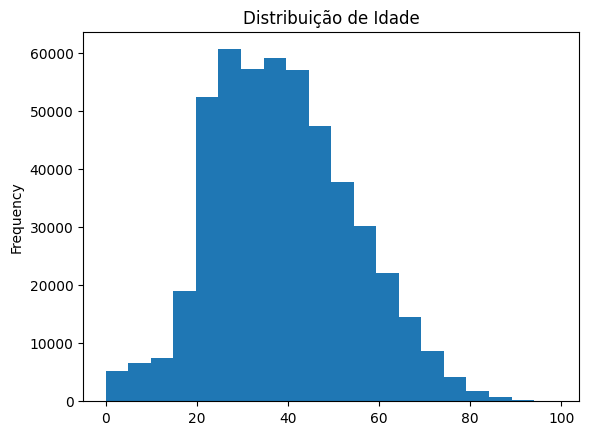

In [8]:
df1['idade'].plot(kind='hist', bins=20, title='Distribuição de Idade')

### Quantidade por UF

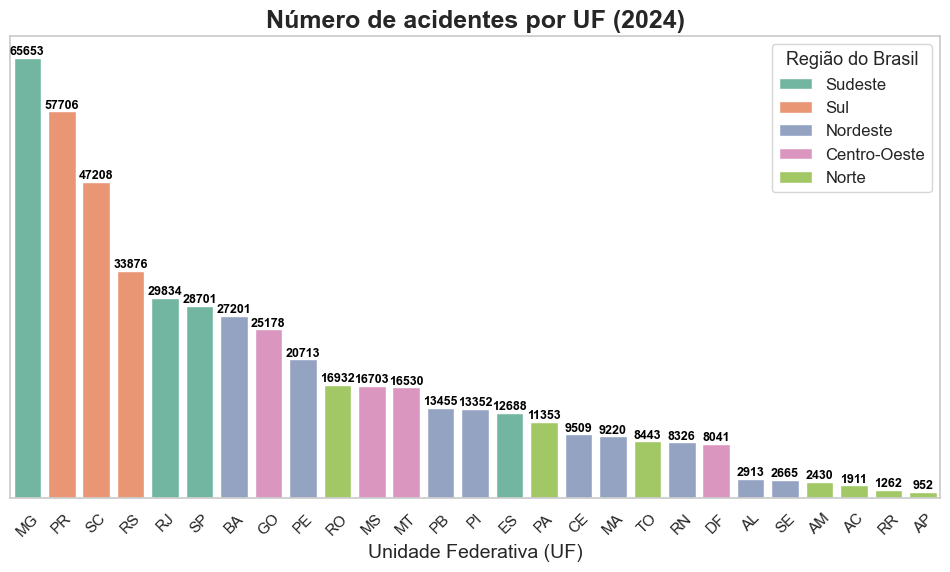

In [9]:
#CONTRIBUIÇÃO DO COLEGA RODRIGO

import seaborn as sns
import matplotlib.pyplot as plt

# Contar acidentes por UF
acidentes_por_uf = df1["uf"].value_counts().reset_index()
acidentes_por_uf.columns = ["UF", "Total_Acidentes"]

# Dicionário de regiões por estado
regioes = {
    "Norte": ["AC","AP","AM","PA","RO","RR","TO"],
    "Nordeste": ["AL","BA","CE","MA","PB","PE","PI","RN","SE"],
    "Centro-Oeste": ["GO","MT","MS","DF"],
    "Sudeste": ["ES","MG","RJ","SP"],
    "Sul": ["PR","RS","SC"]
}

# Criar coluna 'Região' no DataFrame
def identificar_regiao(uf):
    for regiao, estados in regioes.items():
        if uf in estados:
            return regiao
    return "Desconhecido"

acidentes_por_uf["Região"] = acidentes_por_uf["UF"].apply(identificar_regiao)

# Configurar estilo
sns.set_theme(style="whitegrid")

# Criar gráfico de barras colorido por região
plt.figure(figsize=(12, 6))
grafico = sns.barplot(
    data=acidentes_por_uf,
    x="UF",
    y="Total_Acidentes",
    hue="Região",          # cores por região
    dodge=False,           # barras não duplicadas
    palette="Set2"         # paleta de cores agradável
)

# Adicionar rótulos acima das barras
for p in grafico.patches:
    if p.get_height() > 0:
        grafico.annotate(
            format(p.get_height(), ".0f"),
            (p.get_x() + p.get_width() / 2., p.get_height()),
            ha="center", va="bottom",
            color="black", weight="bold", fontsize=9
    )

# Personalizar layout
plt.title("Número de acidentes por UF (2024)", fontsize=18, weight="bold")
plt.xlabel("Unidade Federativa (UF)", fontsize=14)
plt.ylabel("")         
plt.yticks([])          
plt.xticks(rotation=45) # evita sobreposição dos estados
plt.legend(title="Região do Brasil", fontsize=12, title_fontsize=13)

plt.show()

### Quantidade por mês

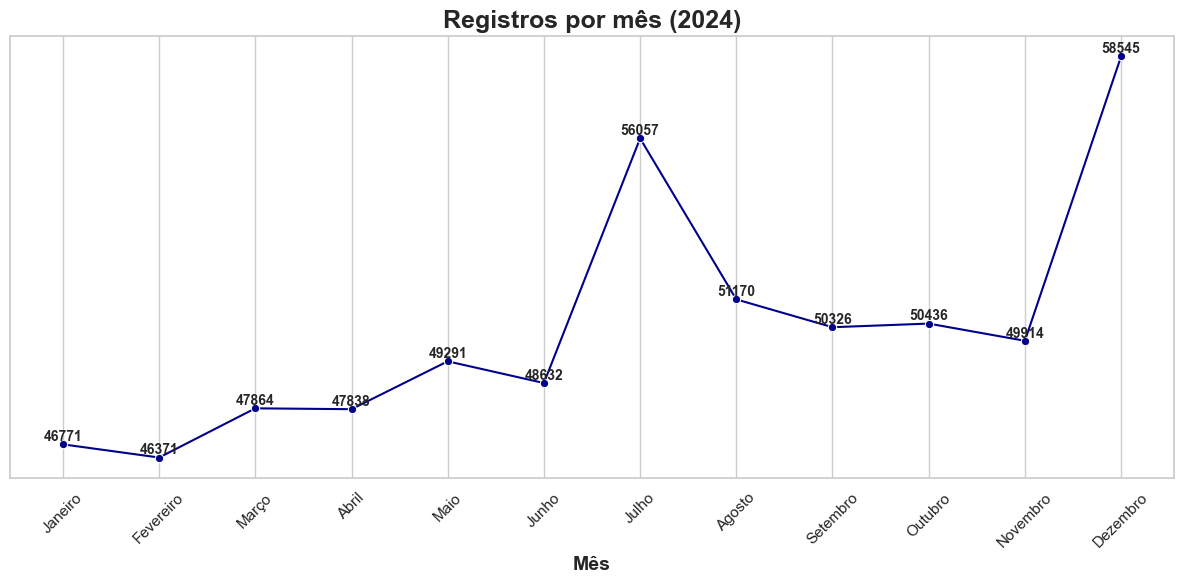

In [10]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Carregar a base
df1 = pd.read_csv(
    "acidentes2024_todas_causas_tipos.csv",
    encoding="ISO-8859-1",
    sep=";"
)

# Converter a coluna de data (formatos mistos)
df1["data_inversa"] = pd.to_datetime(
    df1["data_inversa"],
    format="mixed",
    dayfirst=True,
    errors="coerce"
)

# Filtrar apenas o ano de 2024
df_2024 = df1[df1["data_inversa"].dt.year == 2024]

# Agrupar por mês
acidentes_por_mes = (
    df_2024.groupby(df_2024["data_inversa"].dt.month)
    .size()
    .reset_index(name="Total_Acidentes")
)

# Mapear número do mês para nome do mês em português
meses = {
    1: "Janeiro", 2: "Fevereiro", 3: "Março", 4: "Abril",
    5: "Maio", 6: "Junho", 7: "Julho", 8: "Agosto",
    9: "Setembro", 10: "Outubro", 11: "Novembro", 12: "Dezembro"
}
acidentes_por_mes["Mês"] = acidentes_por_mes["data_inversa"].map(meses)

# Garantir ordem correta dos meses
ordem_meses = list(meses.values())
acidentes_por_mes["Mês"] = pd.Categorical(
    acidentes_por_mes["Mês"],
    categories=ordem_meses,
    ordered=True
)
acidentes_por_mes = acidentes_por_mes.sort_values("Mês")

# Configurar estilo
sns.set_theme(style="whitegrid")

# Criar gráfico de linha
plt.figure(figsize=(12, 6))
sns.lineplot(
    data=acidentes_por_mes,
    x="Mês",
    y="Total_Acidentes",
    marker="o",
    color="darkblue"
)

# Personalizar layout
plt.title("Registros por mês (2024)", fontsize=18, weight="bold")
plt.xlabel("Mês", fontsize=14, weight="bold")
plt.ylabel("")
plt.yticks([])
plt.xticks(rotation=45)

# Adicionar valores nos pontos
for i, row in acidentes_por_mes.iterrows():
    plt.text(
        i,
        row["Total_Acidentes"] + 5,
        str(row["Total_Acidentes"]),
        ha="center",
        va="bottom",
        fontsize=10,
        weight="bold"
    )

plt.tight_layout()
plt.show()


### Análise de vítimas

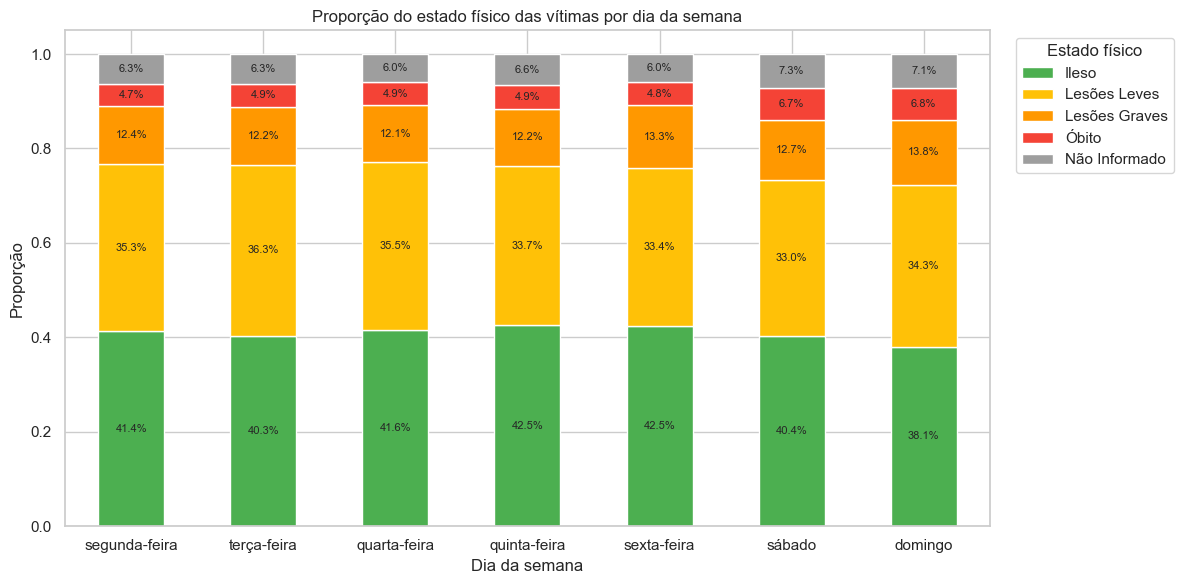

In [11]:
# CONTRIBUIÇÃO FERNANDA
"""
Observa-se que, nos dias úteis, há maior proporção de vítimas ilesas,
enquanto nos fins de semana ocorre redução desse percentual e aumento
relativo de lesões graves e óbitos. Os maiores percentuais de óbitos
são registrados no sábado e no domingo, indicando maior severidade
dos acidentes nesse período.
"""


import pandas as pd
import matplotlib.pyplot as plt

# Limpeza básica
df1.columns = df1.columns.str.strip()

df1['estado_fisico'] = (
    df1['estado_fisico']
    .astype(str)
    .str.strip()
    .str.title()
)

# Ordem dos dias da semana
ordem_dias = [
    'segunda-feira', 'terça-feira', 'quarta-feira',
    'quinta-feira', 'sexta-feira', 'sábado', 'domingo'
]

df1['dia_semana'] = pd.Categorical(
    df1['dia_semana'],
    categories=ordem_dias,
    ordered=True
)

# Tabela de contingência
tabela = pd.crosstab(df1['dia_semana'], df1['estado_fisico'])

# Ordem da gravidade
ordem_gravidade = [
    'Ileso',
    'Lesões Leves',
    'Lesões Graves',
    'Óbito',
    'Não Informado'
]

tabela = tabela[[c for c in ordem_gravidade if c in tabela.columns]]

# Converter para proporção
tabela_pct = tabela.div(tabela.sum(axis=1), axis=0)

# Cores
cores = [
    '#4CAF50',
    '#FFC107',
    '#FF9800',
    '#F44336',
    '#9E9E9E'
]

# Plot
ax = tabela_pct.plot(
    kind='bar',
    stacked=True,
    figsize=(12, 6),
    color=cores
)

plt.xlabel('Dia da semana')
plt.ylabel('Proporção')
plt.title('Proporção do estado físico das vítimas por dia da semana')

plt.legend(
    title='Estado físico',
    bbox_to_anchor=(1.02, 1),
    loc='upper left'
)

ax.set_xticklabels(ordem_dias, rotation=0, ha='center')

# Percentuais
for container in ax.containers:
    ax.bar_label(
        container,
        labels=[f'{v*100:.1f}%' if v >= 0.03 else '' for v in container.datavalues],
        label_type='center',
        fontsize=8
    )

plt.tight_layout()
plt.show()


estado_fisico
Ileso            223038
Lesões Leves     187532
Lesões Graves     69498
Óbito             29810
Não Informado     35696
Name: count, dtype: int64
estado_fisico
Ileso            0.408813
Lesões Leves     0.343733
Lesões Graves    0.127385
Óbito            0.054640
Não Informado    0.065428
Name: count, dtype: float64


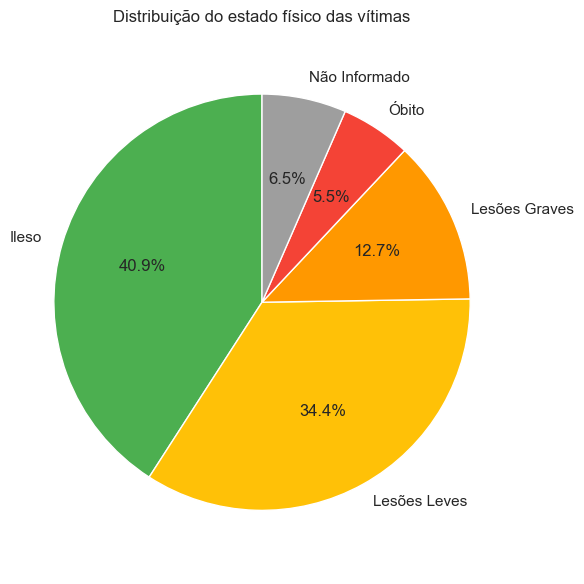

In [12]:
#Contribuição da colega Fernanda
"""
A maior parte das vítimas é composta por ilesos e lesões leves.
Entretanto, aproximadamente 18% dos registros envolvem lesões graves
ou óbitos, evidenciando a relevância do impacto dos acidentes.
A presença de registros não informados indica limitações da base.
"""

# Trabalhar em um único DataFrame
df1 = df1.copy()

# Converter NaN reais em 'NA' (igual ao Excel)
df1['estado_fisico'] = df1['estado_fisico'].fillna('NA')

# Padronizar texto
df1['estado_fisico'] = (
    df1['estado_fisico']
    .astype(str)
    .str.strip()
    .str.title()
)

# Contagem
contagem = df1['estado_fisico'].value_counts()

# Ordem EXATA igual ao Excel
ordem_gravidade = [
    'Ileso',
    'Lesões Leves',
    'Lesões Graves',
    'Óbito',
    'NA',
    'Não Informado'
]

contagem = contagem[[c for c in ordem_gravidade if c in contagem.index]]

# Conferência — ISSO DEVE BATER COM O EXCEL
print(contagem)
print(contagem / contagem.sum())

# Cores
mapa_cores = {
    'Ileso': '#4CAF50',
    'Lesões Leves': '#FFC107',
    'Lesões Graves': '#FF9800',
    'Óbito': '#F44336',
    'NA': '#BDBDBD',
    'Não Informado': '#9E9E9E'
}

cores = [mapa_cores[c] for c in contagem.index]

# Gráfico de pizza
plt.figure(figsize=(6, 6))
plt.pie(
    contagem.values,
    labels=contagem.index,
    autopct='%1.1f%%',
    startangle=90,
    colors=cores
)

plt.title('Distribuição do estado físico das vítimas')
plt.axis('equal')
plt.tight_layout()
plt.show()


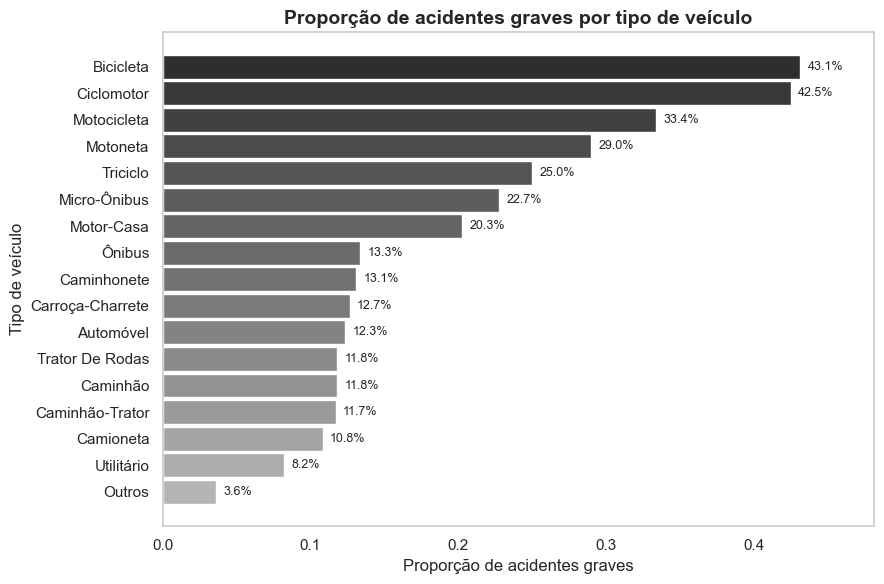

In [13]:
#Contribuição da colega Fernanda

"""
Veículos de menor porte, como bicicletas, ciclomotores e motocicletas,
apresentam as maiores proporções de acidentes graves, evidenciando a
maior vulnerabilidade de seus ocupantes. Já veículos de maior porte
registram menores proporções relativas de gravidade.
"""

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# =========================
# 2. Limpeza básica
# =========================
df1.columns = df1.columns.str.strip()

df1['estado_fisico'] = (
    df1['estado_fisico']
    .astype(str)
    .str.strip()
    .str.title()
)

df1['tipo_veiculo'] = (
    df1['tipo_veiculo']
    .astype(str)
    .str.strip()
    .str.title()
)

# =========================
# 3. Definir acidentes graves
# =========================
df_graves = df1[df1['estado_fisico'].isin(['Lesões Graves', 'Óbito'])]

# =========================
# 4. Cálculo por tipo de veículo
# =========================
total_por_tipo = df1['tipo_veiculo'].value_counts()
graves_por_tipo = df_graves['tipo_veiculo'].value_counts()

comparacao = pd.DataFrame({
    'Total': total_por_tipo,
    'Graves': graves_por_tipo
}).fillna(0)

comparacao['Proporcao_Graves'] = comparacao['Graves'] / comparacao['Total']

# Remover tipos sem acidentes graves
comparacao = comparacao[comparacao['Proporcao_Graves'] > 0]

# Filtrar volume mínimo
comparacao = comparacao[comparacao['Total'] >= 50]

# Ordenar
comparacao = comparacao.sort_values('Proporcao_Graves', ascending=True)

# =========================
# 5. Remover "Reboque" e "Semireboque"/"Semirreboque"
# =========================
comparacao.index = comparacao.index.str.strip().str.title()
comparacao = comparacao[~comparacao.index.str.contains("Reboque", case=False)]

# 🔧 Substituir "Nan" por "Pedestres/Testemunhas"
comparacao.rename(index={"Nan": "Pedestres/Testemunhas"}, inplace=True)

# =========================
# 6. Gráfico
# =========================
plt.figure(figsize=(9, 6))

cores = plt.cm.Greys(np.linspace(0.4, 0.85, len(comparacao)))

bars = plt.barh(
    comparacao.index,
    comparacao['Proporcao_Graves'],
    color=cores,
    height=0.9
)

plt.xlabel('Proporção de acidentes graves')
plt.ylabel('Tipo de veículo')
plt.title('Proporção de acidentes graves por tipo de veículo', fontsize=14, fontweight='bold')

# Adicionar percentual no fim de cada barra
for bar in bars:
    largura = bar.get_width()
    plt.text(
        largura + 0.005,
        bar.get_y() + bar.get_height() / 2,
        f'{largura*100:.1f}%',
        va='center',
        fontsize=9
    )

# Remover linhas de grade
plt.grid(False)

# 🔧 Ajustar limites do eixo X para não cortar os rótulos
plt.xlim(0, comparacao['Proporcao_Graves'].max() + 0.05)

plt.tight_layout()
plt.show()

In [14]:
#CONTRIBUIÇÃO DA COLEGA CINTIA

# Remover duplicatas de pesid
df_limpo = df1.drop_duplicates(subset=['pesid'], keep='first')

# criar Dataframe agregado por acidente 
df_acidentes = (
     df_limpo.groupby('id', as_index=False).agg({
        'mortos': 'sum',
        'feridos_leves': 'sum',
        'feridos_graves': 'sum',
        'ilesos': 'sum',
        'br': 'first',
        'km': 'first',
        'uf': 'first',
        'municipio': 'first',
        'fase_dia': 'first',
        'classificacao_acidente': 'first',
        'data_inversa': 'first'
    }))

# os dados originais apresentam granularidade ao nível do invíduo, de modo que o mesmo acidente parecem várias vezes (mesmos ID's), dessa forma, para
# análises relacionadas em ocorrência do acidente, os dados foram agregados pelo ID do acidente.

In [15]:
vitimas_totais = ['mortos', 'feridos_leves', 'feridos_graves', 'ilesos']

media_vitimas = df_acidentes[vitimas_totais].mean()
mediana_vitimas = df_acidentes[vitimas_totais].median()
moda_vitimas = df_acidentes[vitimas_totais].mode()

resultado = pd.DataFrame({
    'Média de vítimas': media_vitimas,
    'Mediana de vítimas': mediana_vitimas,
    'Moda de vítimas': moda_vitimas.iloc[0]  })

print(resultado)

                Média de vítimas  Mediana de vítimas  Moda de vítimas
mortos                  0.084204                 0.0              0.0
feridos_leves           0.877331                 1.0              1.0
feridos_graves          0.278091                 0.0              0.0
ilesos                  1.048103                 1.0              1.0


<Axes: title={'center': 'Distribuição por Sexo'}>

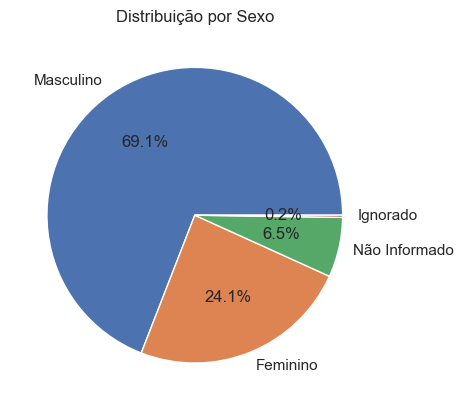

In [16]:
df1['sexo'].value_counts().plot(kind='pie', autopct='%1.1f%%', title='Distribuição por Sexo')

In [17]:
amplitude_vitimas = df_acidentes[vitimas_totais].max() - df_acidentes[vitimas_totais].min()
coef_variacao_vitimas = (df_acidentes[vitimas_totais].std() / df_acidentes[vitimas_totais].mean() * 100).round(2)
variancia = df_acidentes[vitimas_totais].var()
desvio_padrao = df_acidentes[vitimas_totais].std()
Q1_vitimas = df_acidentes[vitimas_totais].quantile(0.25)
Q3_vitimas = df_acidentes[vitimas_totais].quantile(0.75)
IQR_vitimas = Q3_vitimas - Q1_vitimas

resultado = pd.DataFrame({
    'Amplitude': amplitude_vitimas,
    'Coef Var': coef_variacao_vitimas,
    'Variância': variancia,
    'Desvio Padrão': desvio_padrao,
  
    
})
    
print(resultado)

                Amplitude  Coef Var  Variância  Desvio Padrão
mortos               37.0    442.74   0.138983       0.372804
feridos_leves        83.0    128.46   1.270114       1.126993
feridos_graves       35.0    228.70   0.404491       0.635996
ilesos               78.0    166.63   3.050259       1.746499


In [18]:
# Quartis
resultado2 = pd.DataFrame({
    'Q1': Q1_vitimas,
    'Q3': Q3_vitimas,
    'IQR': IQR_vitimas
        
})
print( resultado2)

                 Q1   Q3  IQR
mortos          0.0  0.0  0.0
feridos_leves   0.0  1.0  1.0
feridos_graves  0.0  0.0  0.0
ilesos          0.0  1.0  1.0


### Análise de Acidentes

In [19]:
# Frequencia de acidentes
tipo_acidente_freq = pd.DataFrame({
    'Frequência': df1['tipo_acidente'].value_counts(),
    'Porcentagem': (df1['tipo_acidente'].value_counts(normalize=True) * 100).round(2)
})


print(tipo_acidente_freq.head(10))

                                Frequência  Porcentagem
tipo_acidente                                          
Tombamento                           85631        14.20
Colisão traseira                     85089        14.11
Saída de leito carroçável            77573        12.86
Queda de ocupante de veículo         75389        12.50
Colisão com objeto                   47737         7.91
Colisão transversal                  46433         7.70
Colisão lateral mesmo sentido        43023         7.13
Colisão frontal                      41892         6.94
Capotamento                          28663         4.75
Colisão lateral sentido oposto       19772         3.28


In [20]:
acidentes_por_estado = pd.DataFrame({
    'Total Acidentes': df_acidentes['uf'].value_counts(),
    'Total Mortos': df_acidentes.groupby('uf')['mortos'].sum(),
    'Taxa Mortalidade': (df_acidentes.groupby('uf')['mortos'].sum() / 
                        df_acidentes.groupby('uf')['mortos'].count()).round(2)
})


print(acidentes_por_estado.sort_values('Total Mortos', ascending=False).head(10))

    Total Acidentes  Total Mortos  Taxa Mortalidade
uf                                                 
MG             9296         794.0              0.09
BA             4151         619.0              0.15
PR             7576         607.0              0.08
SC             8381         415.0              0.05
RS             5206         346.0              0.07
RJ             6389         333.0              0.05
PE             3230         312.0              0.10
GO             3305         297.0              0.09
MA             1138         280.0              0.25
MT             2554         244.0              0.10


In [21]:
causas_principais = df1.groupby('causa_acidente').agg({
    'id': 'nunique',
    'mortos': 'sum',
    'feridos_graves': 'sum'
}).sort_values('mortos', ascending=False)

causas_principais.columns = ['Total Acidentes', 'Mortos', 'Feridos']

print(causas_principais)

                                          Total Acidentes  Mortos  Feridos
causa_acidente                                                            
Velocidade Incompatível                              9217  3843.0   7358.0
Reação tardia ou ineficiente do condutor            16162  3695.0   9280.0
Ausência de reação do condutor                      14736  3622.0   8451.0
Transitar na contramão                               2949  2533.0   3341.0
Ingestão de álcool pelo condutor                     6399  1463.0   3337.0
...                                                   ...     ...      ...
Sinalização encoberta                                  30     8.0      6.0
Redutor de velocidade em desacordo                     33     7.0     21.0
Modificação proibida                                   23     4.0     20.0
Semáforo com defeito                                   18     0.0     18.0
Transitar na calçada                                   14     0.0      7.0

[70 rows x 3 columns]


In [22]:
letalidade_por_tipo = df1.groupby('tipo_acidente').agg({
    'mortos': 'sum',
    'feridos_graves': 'sum',
    'id': 'count'
}).sort_values('mortos', ascending=False)

letalidade_por_tipo.columns = ['Mortos', 'Feridos Graves', 'Total Acidentes']

print(letalidade_por_tipo)

                                Mortos  Feridos Graves  Total Acidentes
tipo_acidente                                                          
Colisão frontal                 4749.0          7090.0            41892
Saída de leito carroçável       4439.0          9006.0            77573
Tombamento                      4090.0         11554.0            85631
Queda de ocupante de veículo    4067.0         11277.0            75389
Colisão com objeto              2433.0          5201.0            47737
Atropelamento de Pedestre       2392.0          2710.0            17374
Colisão traseira                1783.0          6546.0            85089
Capotamento                     1622.0          3706.0            28663
Colisão transversal             1149.0          5610.0            46433
Colisão lateral sentido oposto   723.0          1664.0            19772
Derramamento de carga            670.0           676.0             8120
Incêndio                         601.0           376.0          

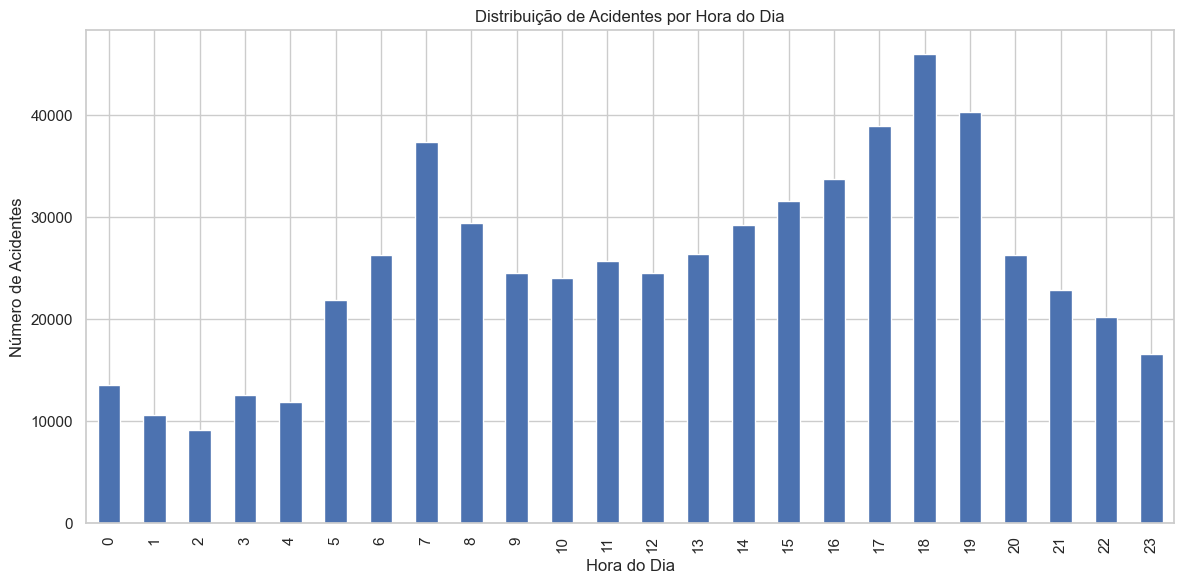

In [23]:
import pandas as pd
import matplotlib.pyplot as plt


df1['data_inversa'] = pd.to_datetime( #converte data
    df1['data_inversa'],
    format='mixed',
    dayfirst=True,
    errors='coerce'
)



df1['hora_pura'] = pd.to_datetime( # converte horario
    df1['horario'],
    format='mixed',
    errors='coerce'
).dt.hour



# por hora do dia

plt.figure(figsize=(12, 6))
df1['hora_pura'].value_counts().sort_index().plot(kind='bar')
plt.title("Distribuição de Acidentes por Hora do Dia")
plt.xlabel("Hora do Dia")
plt.ylabel("Número de Acidentes")
plt.xticks(range(0, 24))
plt.tight_layout()
plt.show()


In [24]:
impacto_clima = df1.groupby('condicao_metereologica').agg({
    'mortos': 'mean',
    'id': 'count'
}).sort_values('mortos', ascending=False)

impacto_clima

,mortos,id
condicao_metereologica,,
Ignorado,0.088004,5987
Nevoeiro/Neblina,0.073584,6678
Céu Claro,0.058628,374200
Nublado,0.047964,87704
Chuva,0.047112,69014
Garoa/Chuvisco,0.044222,26392
Sol,0.041995,32525
Vento,0.022866,692
Neve,0.000000,2


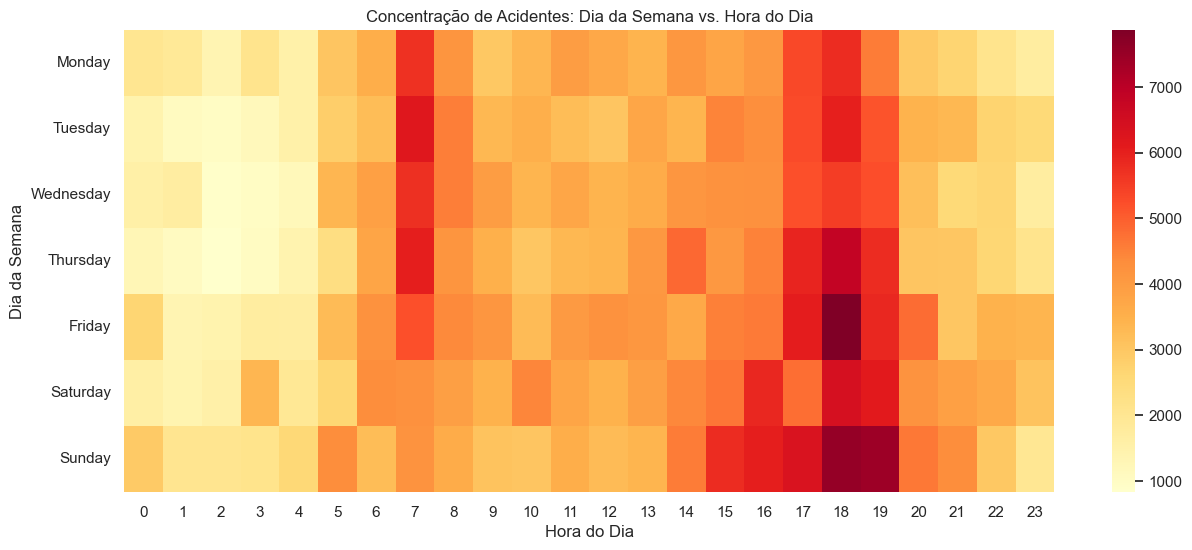

In [25]:
# Preparação dos dados temporais
df1['horario'] = pd.to_datetime(df1['horario'], format='%H:%M:%S').dt.hour
df1['dia_semana'] = pd.to_datetime(df1['data_inversa']).dt.day_name()

# Reordenar dias da semana
dias_ordem = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']

# Criar tabela dinâmica para o heatmap
heatmap_data = df1.pivot_table(index='dia_semana', columns='horario', values='id', aggfunc='count').reindex(dias_ordem)

# Plotar
plt.figure(figsize=(15, 6))
sns.heatmap(heatmap_data, cmap='YlOrRd', annot=False)
plt.title('Concentração de Acidentes: Dia da Semana vs. Hora do Dia')
plt.xlabel('Hora do Dia')
plt.ylabel('Dia da Semana')
plt.show()

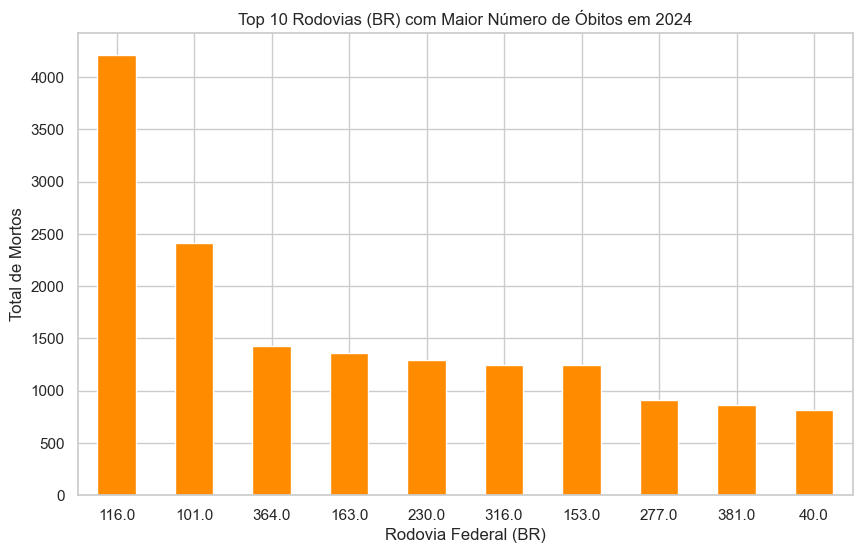

In [26]:
# Top 10 BRs com mais mortes 
br_fatais = df1.groupby('br')['mortos'].sum().sort_values(ascending=False).head(10)

plt.figure(figsize=(10, 6))
br_fatais.plot(kind='bar', color='darkorange')
plt.title('Top 10 Rodovias (BR) com Maior Número de Óbitos em 2024')
plt.xlabel('Rodovia Federal (BR)')
plt.ylabel('Total de Mortos')
plt.xticks(rotation=0)
plt.show()

### Probabilidades 

In [27]:
# Cálculo de probabilidades empíricas
total_acidentes = len(df_acidentes)

# Probabilidade de um acidente ter vítimas fatais
P_mortos = (df_acidentes['mortos'] > 0).sum() / total_acidentes
print(f"P(acidente com mortos) = {P_mortos:.3%}")

# Probabilidade de um acidente ter feridos graves
P_feridos_graves = (df_acidentes['feridos_graves'] > 0).sum() / total_acidentes
print(f"P(acidente com feridos graves) = {P_feridos_graves:.3%}")

# Probabilidade de acidente com mortos E feridos graves
P_mortos_e_graves = ((df_acidentes['mortos'] > 0) & (df_acidentes['feridos_graves'] > 0)).sum() / total_acidentes
print(f"P(acidente com mortos E feridos graves) = {P_mortos_e_graves:.3%}")

P(acidente com mortos) = 7.138%
P(acidente com feridos graves) = 22.632%
P(acidente com mortos E feridos graves) = 1.577%


In [28]:
# distribuição Poisson para número de mortos por acidente
import math

# média de mortos por acidente
lambda_mortos = df_acidentes['mortos'].mean()

# probabilidade de exatamente 3 mortos
k = 3
prob_3_mortos = (math.exp(-lambda_mortos) * (lambda_mortos ** k)) / math.factorial(k)

print(f"P(exatamente 3 mortos por acidente) = {prob_3_mortos:.6f}")

# Teste simples de sobredispersão
var_mortos = df_acidentes['mortos'].var()
print(f"Razão variância/média (mortos): {var_mortos / lambda_mortos:.2f}")


P(exatamente 3 mortos por acidente) = 0.000091
Razão variância/média (mortos): 1.65


In [29]:
# Risco de morte para motociclistas ou outros veículos
motociclistas = df1[df1['tipo_veiculo'] == 'Motocicleta']
outros = df1[df1['tipo_veiculo'] != 'Motocicleta']

risco_moto = (motociclistas['mortos'] > 0).mean()
risco_outros = (outros['mortos'] > 0).mean()
risco_relativo = risco_moto / risco_outros

print(f"Risco motociclistas: {risco_moto:.2%}")
print(f"Risco outros veículos: {risco_outros:.2%}")
print(f"Risco relativo: {risco_relativo:.2f}x")

Risco motociclistas: 8.42%
Risco outros veículos: 4.10%
Risco relativo: 2.05x


In [30]:
# P(morte) - probabilidade a priori
P_morte = (df1['mortos'] > 0).mean()

# P(colisão frontal | morte) 
mortes = df1[df1['mortos'] > 0]
P_colisao_dado_morte = (mortes['tipo_acidente'] == 'Colisão frontal').mean()

# P(colisão frontal) - evidência
P_colisao = (df1['tipo_acidente'] == 'Colisão frontal').mean()

# Teorema de Bayes: P(morte | colisão frontal)
P_morte_dado_colisao = (P_colisao_dado_morte * P_morte) / P_colisao

print(f"P(morte) = {P_morte:.2%}")
print(f"P(colisão frontal | morte) = {P_colisao_dado_morte:.2%}")
print(f"P(colisão frontal) = {P_colisao:.2%}")
print(f"P(morte | colisão frontal) = {P_morte_dado_colisao:.2%}")

P(morte) = 4.94%
P(colisão frontal | morte) = 15.93%
P(colisão frontal) = 6.94%
P(morte | colisão frontal) = 11.34%


In [31]:
# Probabilidade de acidente grave
p_grave = P_feridos_graves  # já calculada antes

k = 5  # primeiro acidente grave ocorre no 5º acidente

prob_geometrica = (1 - p_grave) ** (k - 1) * p_grave

print(f"P(primeiro acidente grave no {k}º acidente) = {prob_geometrica:.6f}")


P(primeiro acidente grave no 5º acidente) = 0.081090


In [32]:
#Contribuição do colega RAFAEL

'''O maior número de acidentes acontece em retas.
Isso faz sentido porque, em trechos retos, os motoristas costumam:
• andar em velocidade mais alta,

• fazer ultrapassagens arriscadas,
• ficar mais distraídos ou cansados.
Nos dados, aparecem mais de 160 mil acidentes em retas de pista simples, o que explica o alto
volume nesse tipo de via.'''

print('--- FREQUÊNCIA DE ACIDENTES POR TRAÇADO DA VIA ---')

dicio = dict(df1['tracado_via'].value_counts())

for tipo, numero in dicio.items():
    print(f'{tipo} -> {numero}')



--- FREQUÊNCIA DE ACIDENTES POR TRAÇADO DA VIA ---
Reta -> 307514
Curva -> 61952
Reta;Declive -> 22710
Curva;Declive -> 19768
Declive;Reta -> 18494
Reta;Aclive -> 18049
Aclive;Reta -> 14675
Declive;Curva -> 13911
Interseção de Vias -> 10608
Reta;Interseção de Vias -> 10296
Declive -> 8396
Curva;Aclive -> 7943
Aclive -> 7450
Interseção de Vias;Reta -> 7260
Rotatória -> 6633
Reta;Em Obras -> 4779
Aclive;Curva -> 4616
Reta;Ponte -> 4009
Retorno Regulamentado -> 3259
Retorno Regulamentado;Reta -> 3233
Reta;Retorno Regulamentado -> 2789
Em Obras;Reta -> 2564
Viaduto -> 1490
Ponte;Reta -> 1294
Curva;Interseção de Vias -> 1110
Reta;Viaduto -> 1104
Ponte -> 985
Interseção de Vias;Rotatória -> 893
Reta;Rotatória -> 870
Interseção de Vias;Curva -> 842
Viaduto;Reta -> 791
Reta;Declive;Em Obras -> 764
Rotatória;Reta -> 741
Curva;Em Obras -> 585
Declive;Ponte -> 570
Rotatória;Interseção de Vias -> 548
Aclive;Reta;Retorno Regulamentado -> 511
Aclive;Interseção de Vias -> 422
Em Obras -> 402
Rotatóri

In [33]:
#Contribuição do colega Rafael

'''Apesar de muitos acidentes acontecerem em retas, os acidentes mais graves ocorrem em
pistas simples.
Isso acontece porque, nesse tipo de rodovia:
• qualquer erro pode virar colisão frontal,
• não há separação física entre os sentidos,
• muitas vezes não existe área de escape.
O gráfico mostra que curvas e pontes em pista simples têm taxas de letalidade muito altas.
No caso das pontes, o risco é maior porque são trechos estreitos, sem acostamento ou espaço
para desvio.'''

print('\n--- FREQUÊNCIA RELATIVA POR TIPO DE PISTA ---')

freq_pista = df1['tipo_pista'].value_counts(normalize=True)

print(freq_pista)



--- FREQUÊNCIA RELATIVA POR TIPO DE PISTA ---
tipo_pista
Simples     0.549288
Dupla       0.366370
Múltipla    0.084341
Name: proportion, dtype: float64


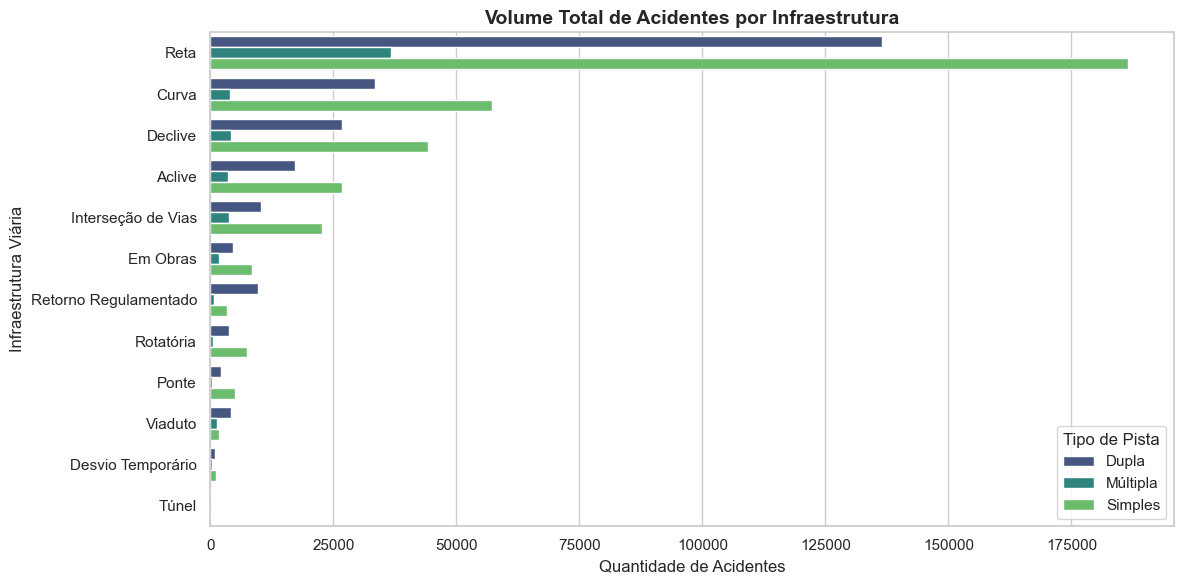

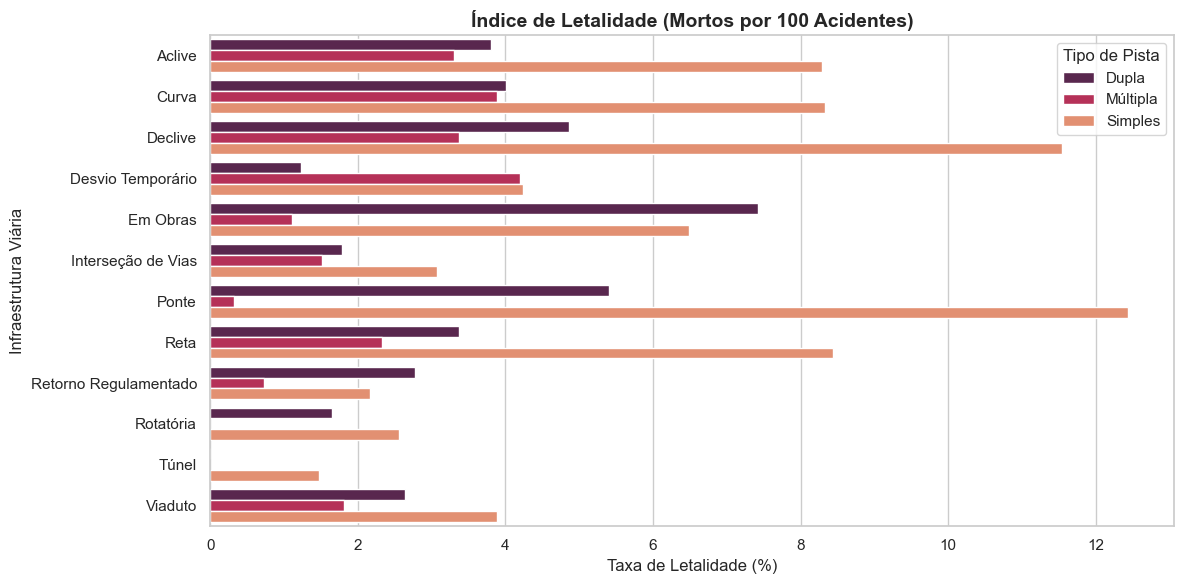

In [34]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
# 1. Carregamento
df1 = pd.read_csv(
'acidentes2024_todas_causas_tipos.csv',
encoding='ISO-8859-1',
sep=';')
df1 = df1[df1['idade'] <= 100]
# 2. NORMALIZAÇÃO DO TRAÇADO
# Divide combinações (Reta;Declive;Curva → linhas separadas)
df1['tracado_via'] = df1['tracado_via'].str.split(';')
df1 = df1.explode('tracado_via')
# Remove espaços extras
df1['tracado_via'] = df1['tracado_via'].str.strip()

# 3. GRÁFICO 1 — VOLUME
plt.figure(figsize=(12, 6))

sns.countplot(
data=df1,
y='tracado_via',
hue='tipo_pista',
order=df1['tracado_via'].value_counts().index,
palette='viridis')

plt.title('Volume Total de Acidentes por Infraestrutura', fontsize=14, weight='bold')
plt.xlabel('Quantidade de Acidentes')
plt.ylabel('Infraestrutura Viária')
plt.legend(title='Tipo de Pista')
plt.tight_layout()
plt.show()
# 4. LETALIDADE
letalidade = (
df1
.groupby(['tracado_via', 'tipo_pista'])
.agg(
acidentes=('mortos', 'count'),
mortos=('mortos', 'sum') )
.reset_index())

# Filtro de robustez estatística
letalidade = letalidade[letalidade['acidentes'] >= 30]

letalidade['letalidade_pct'] = (
letalidade['mortos'] / letalidade['acidentes']
) * 100

# 5. GRÁFICO 2 — LETALIDADE
plt.figure(figsize=(12, 6))

sns.barplot(
data=letalidade,
y='tracado_via',
x='letalidade_pct',
hue='tipo_pista',
palette='rocket')

plt.title('Índice de Letalidade (Mortos por 100 Acidentes)', fontsize=14, weight='bold')
plt.xlabel('Taxa de Letalidade (%)')
plt.ylabel('Infraestrutura Viária')
plt.legend(title='Tipo de Pista')
plt.tight_layout()
plt.show()